In [132]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from pcigale.sed import SED
from pcigale.sed import utils
from pcigale.sed_modules import get_module

import scienceplots
plt.style.use(['science', 'notebook', 'grid']) 
plt.rcParams['figure.figsize'] = [20 , 10]

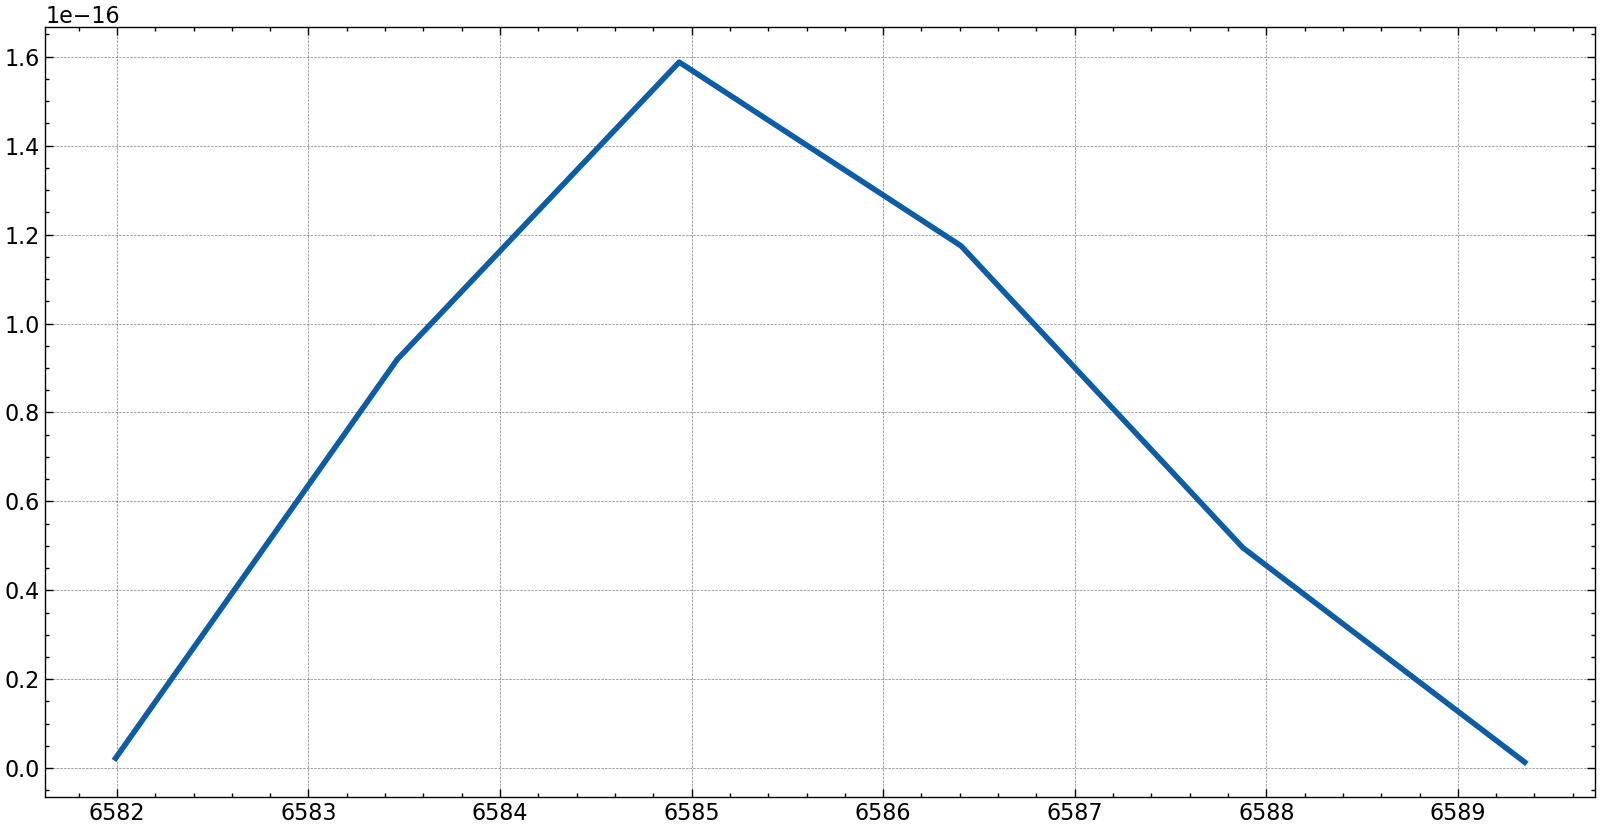

In [133]:
# Now read one of the SDSS spectra
hdu_data = fits.open('Spectra\SDSS_spec_G1.fits')
spflux_data = hdu_data[0].data*1e-17
spwave_data = hdu_data[0].header['CRVAL1']+np.arange(hdu_data[0].header['NAXIS1'])*hdu_data[0].header['CDELT1'] 
redshift = hdu_data[0].header['REDSHIFT']
spwave_data = spwave_data/(1+redshift)

continuum = np.mean(spflux_data[700:1800])

plt.plot(spwave_data[1954:1960], (spflux_data-continuum)[1954:1960], lw=4, label='Data')

**Hypotesys:** the h-alpha line is produced by photo-ionization of hydrogen in the interstellar medium. In order to do this, photons of 912 Angstrom are required (i.e temperatures of 10^5 K).

## Compute luminosity

In [134]:
import scipy
flux_integral = scipy.integrate.simps(y=(spflux_data-continuum)[1954:1960], x=spwave_data[1954:1960])
flux_integral

6.270009361271042e-16

At first order, a galaxy with redshift $z$ is situated at a distance:

$d = \dfrac{z \times c}{H_o}$

In [135]:
distance = redshift*3e10/70e5
print(f'G1 is at a distance of roughly {distance} Mpc')

G1 is at a distance of roughly 84.0 Mpc


In [136]:
luminosity = flux_integral*4*np.pi*(distance*3.08567758128e24)**2
print(f'Luminosity = {luminosity:.2e} erg/s')

Luminosity = 5.29e+38 erg/s


In [137]:
#1 eV = 1.60218e-12 erg
photon_energy = 1.89 * 1.60218e-12
print(f'Photon energy = {photon_energy:.2e} erg')

Photon energy = 3.03e-12 erg


In [138]:
photons_per_second = luminosity/photon_energy
print(f'Photons per second = {photons_per_second:.2e} 1/s')

Photons per second = 1.75e+50 1/s


In [139]:
SFR = photons_per_second/10e53
print(f'SFR = {SFR:.6f} M_sun/yr')

SFR = 0.000175 M_sun/yr
